### **About this notebook**

In this notebook, I am loading a list of molecules I obtained from PubChem for solubilty check of drug, and will replicate the results for [Ersilia Hub Model mentioned in link](https://github.com/ersilia-os/eos74bo?tab=readme-ov-file) and for the [git hub code of external sourse mentioned in link](https://github.com/ncats/ncats-adme/tree/master)processing them to make sure I have:

- Some data visulization
- Generate the ROC curve for the original github code
- Generate the ROC curves for the EMH code
  - Outcome generated after standardized smiles
- Make the comparison

**OutCome:**

- Is about the substance id highly Soluble or active class = '0' or Low Soluble or Inactive class = '0'
- Outcome is in the probability


## Some screen shoots of runing the app
Of original github code at  [link](https://github.com/ncats/ncats-adme/tree/master).


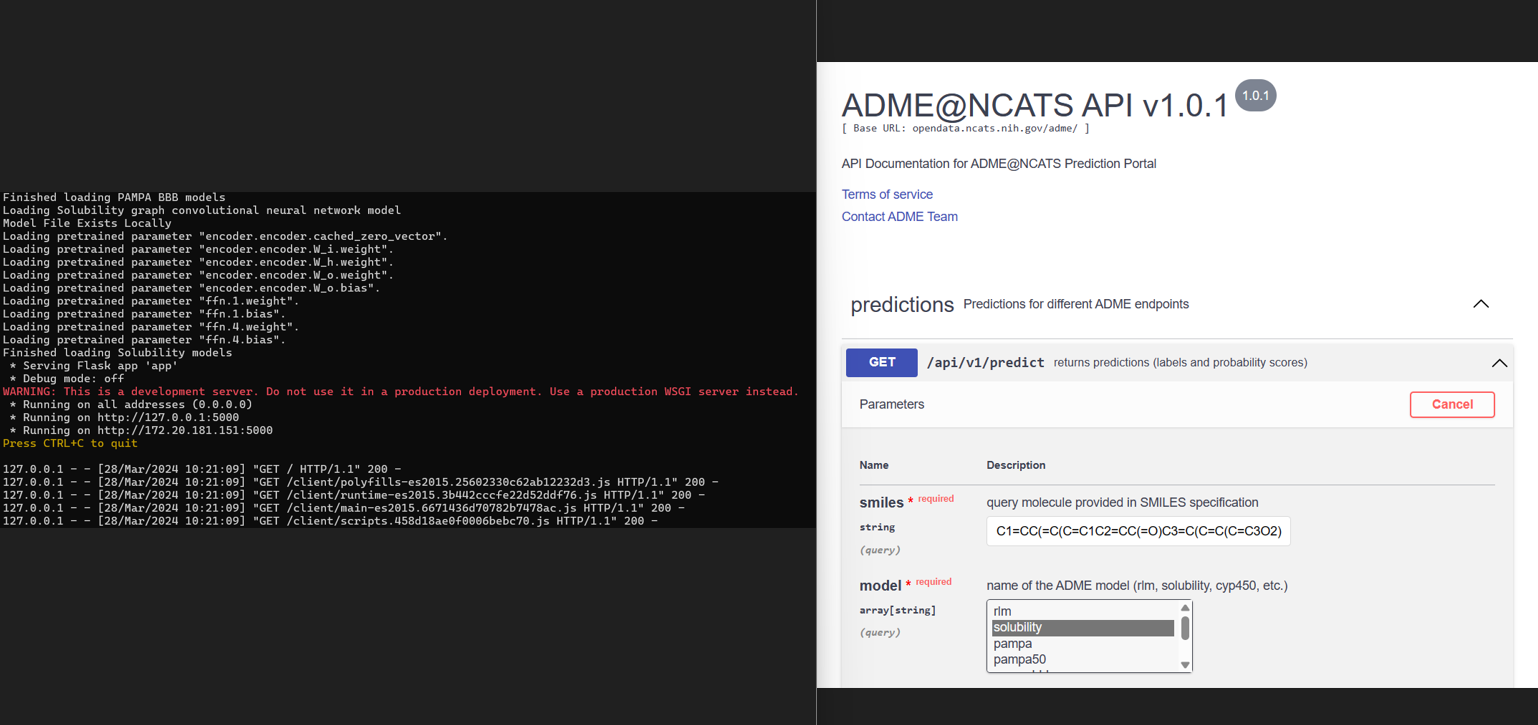

In [66]:
# @title 🏃‍♀️ Install Ersilia on Colab
%%capture
%env MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
%env MINICONDA_PREFIX=/usr/local
%env PYTHONPATH= "$PYTHONPATH:/usr/local/lib/python3.7/site-packages"
%env PIP_ROOT_USER_ACTION=ignore

!wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT
!chmod +x $MINICONDA_INSTALLER_SCRIPT
!./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

!python -m pip install git+https://github.com/ersilia-os/ersilia.git
!python -m pip install requests --upgrade
import sys

_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
#import librarries
import pandas as pd

###**Original Dataset visulization**

In [83]:
# In this codeblock I will load the data from the /data folder to a Pandas dataframe and understand which headers it has
#!ersilia example ncats-solubility -n 1000 -f input.csv
input_file1 = "/content/drive/MyDrive/Colab Notebooks/model-validation-example/Inputs/AID_1645848_datatable.csv" #Orignal Dataset for visulizations
input_file2 = "/content/drive/MyDrive/Colab Notebooks/model-validation-example/Inputs/outputs_for_EMH.csv" # EMH predictions file
input_file3 = "/content/drive/MyDrive/Colab Notebooks/model-validation-example/Inputs/outputs_for_Github.csv" # Github model Predictions file
import os

# Assuming your dataset is stored in a file named 'dataset.csv'
# Load the dataset
original_dataset = pd.read_csv(input_file1)

In [70]:
# Shuffle the data
shuffled_data = original_dataset.sample(frac=1, random_state=42)  # Shuffle with a fixed random state for reproducibility

# Extract the specified columns
selected_columns = ['PUBCHEM_EXT_DATASOURCE_SMILES', 'PUBCHEM_ACTIVITY_OUTCOME','Phenotype', 'Kinetic Aqueous Solubility (ug/mL)','Analysis Comment']
extracted_data = shuffled_data[selected_columns].dropna()

# Keep only 1000 rows
extracted_data = extracted_data.head(1000)

# Print or do further operations with the extracted data
extracted_data


,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_ACTIVITY_OUTCOME,Phenotype,Kinetic Aqueous Solubility (ug/mL),Analysis Comment
2311,C1=CC=C(C=C1)C2=CN=C(S2)NC(=O)C3=CC=C(O3)C4=CC...,Inactive,Low,<1,class = 1
2059,CC1=CC=C(C=C1)S(=O)(=O)NC2=CC=CC=C2C(=O)NC3=NN...,Inactive,Low,<1,class = 1
194,CC1=CN=C(N=C1NCC2CCN(CC2)C3=CN=CC=C3)C4=CC=CC=...,Active,Moderate/High,>61,class = 0
1393,CN(C)C1=C(C=C(C=C1)S(=O)(=O)N2CCCCC2)NS(=O)(=O...,Inactive,Low,2.052,class = 1
764,COC1=NC=C(C=C1)CN2CCNC3=CC(=NC=C3C2)NC4=CC=CC=C4,Active,Moderate/High,31.1,class = 0
...,...,...,...,...,...
2110,CC1=NN(C2=C1C(=CC(=O)N2)C(F)(F)F)CCC3=NC(=CS3)...,Inactive,Low,<1,class = 1
1032,C1CCC(CC1)CN2CCC3=C(CC2)N=C(N=C3C4=CC=C(C=C4)O...,Active,Moderate/High,11.27,class = 0
1483,CCC1=C(C=C(C=C1)NC(=O)C2=C(C(=C(N2)C)C(=O)C)C)...,Inactive,Low,1.188,class = 1
1307,CC1=CC(=NC(=C1)NC(=S)N2CCN(CC2)C3=C(C=C(C=C3)C...,Inactive,Low,3.085,class = 1


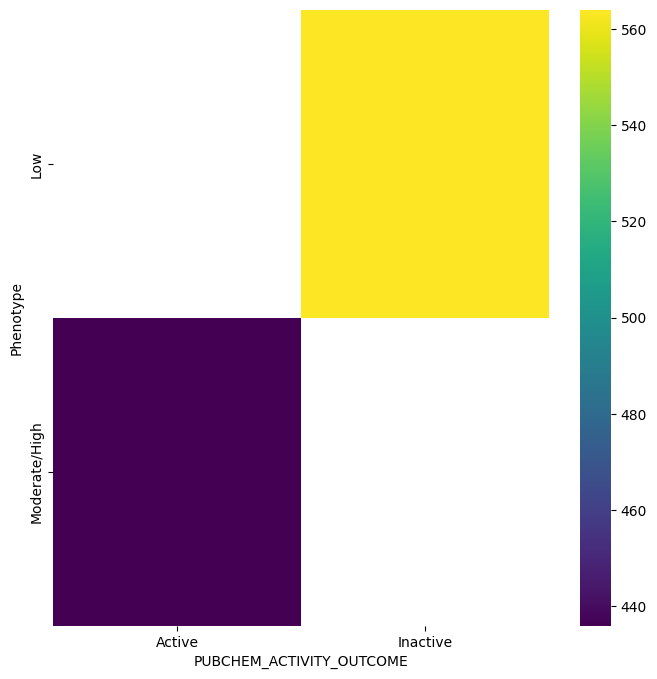

In [71]:
# @title PUBCHEM_ACTIVITY_OUTCOME vs Phenotype

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Phenotype'].value_counts()
    for x_label, grp in extracted_data.groupby('PUBCHEM_ACTIVITY_OUTCOME')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('PUBCHEM_ACTIVITY_OUTCOME')
_ = plt.ylabel('Phenotype')

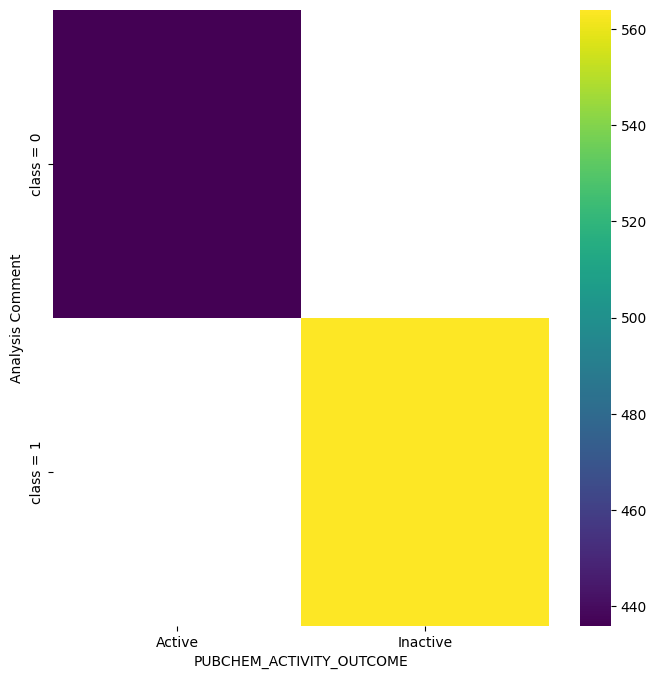

In [72]:
# @title PUBCHEM_ACTIVITY_OUTCOME vs Analysis Comment

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Analysis Comment'].value_counts()
    for x_label, grp in extracted_data.groupby('PUBCHEM_ACTIVITY_OUTCOME')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('PUBCHEM_ACTIVITY_OUTCOME')
_ = plt.ylabel('Analysis Comment')

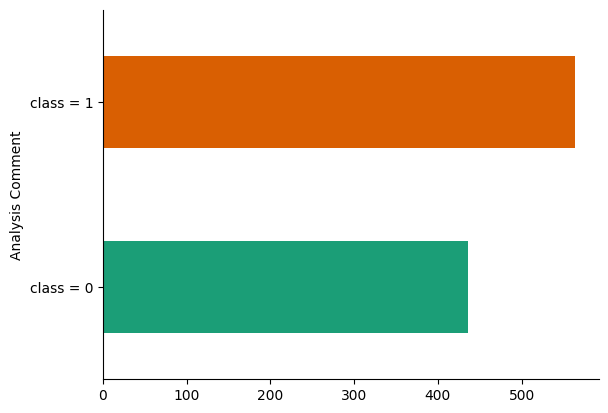

In [73]:
# @title Analysis Comment

from matplotlib import pyplot as plt
import seaborn as sns
extracted_data.groupby('Analysis Comment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

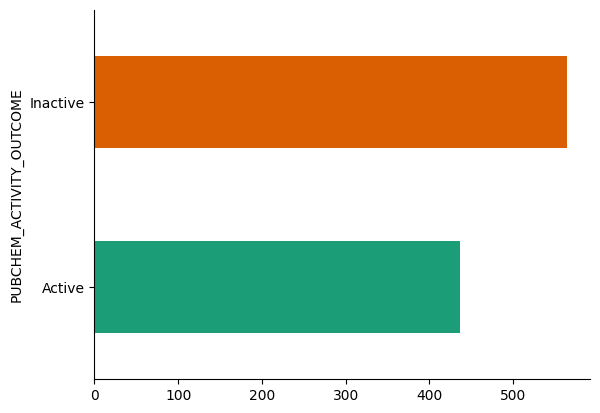

In [74]:
# @title PUBCHEM_ACTIVITY_OUTCOME

from matplotlib import pyplot as plt
import seaborn as sns
extracted_data.groupby('PUBCHEM_ACTIVITY_OUTCOME').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [75]:
extracted_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 2311 to 2064
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   PUBCHEM_EXT_DATASOURCE_SMILES       1000 non-null   object
 1   PUBCHEM_ACTIVITY_OUTCOME            1000 non-null   object
 2   Phenotype                           1000 non-null   object
 3   Kinetic Aqueous Solubility (ug/mL)  1000 non-null   object
 4   Analysis Comment                    1000 non-null   object
dtypes: object(5)
memory usage: 46.9+ KB


### **Draw the molecular structure**

/usr/local/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


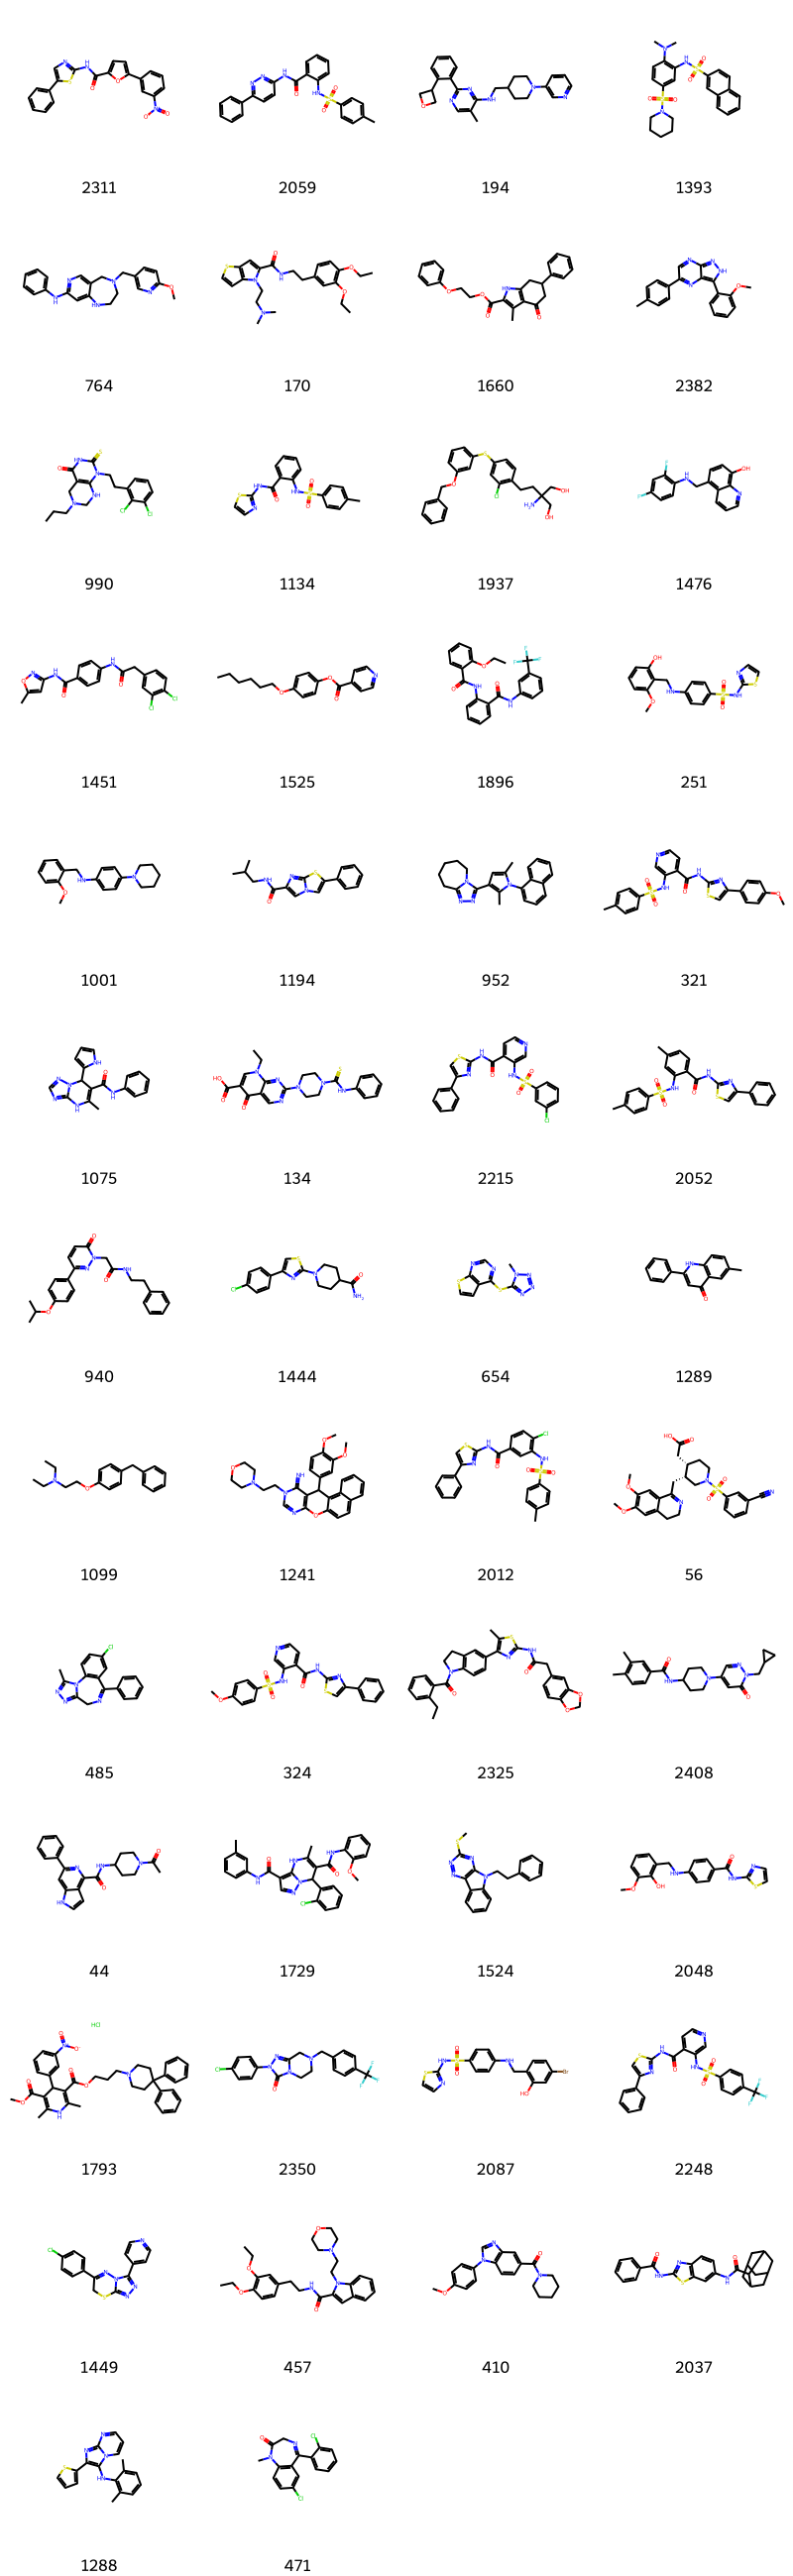

In [76]:
import pandas as pd
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display
import math

# Assuming 'extracted_data' is your DataFrame
# Extract the SMILES column and molecule names
smiles_column = extracted_data['PUBCHEM_EXT_DATASOURCE_SMILES']
molecule_names = extracted_data.index.astype(str).tolist()  # Convert index to string list

# Convert SMILES to RDKit molecules
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_column]

# Draw molecular structures and convert them to images with names
molecule_images = []
for molecule, name in zip(molecules, molecule_names):
    molecule_image = Draw.MolToImage(molecule, size=(200, 200))
    molecule_image_with_name = Draw.MolsToGridImage([molecule], molsPerRow=1, legends=[name], subImgSize=(200,200))
    molecule_images.append(molecule_image_with_name)

# Display molecular images in a grid
num_images = len(molecule_images)
num_cols = 4  # Number of columns in the grid
num_rows = math.ceil(num_images / num_cols)  # Number of rows needed
grid_image = Draw.MolsToGridImage(molecules, molsPerRow=num_cols, subImgSize=(200, 200), legends=molecule_names)
display(grid_image)


## **EMH**
**Load the dataset with predictions and actual values after running the eos74bo model form EMH**

In [84]:
EMH_results = pd.read_csv(input_file2)
EMH_results

,Unnamed: 0,key,input,outcome,y_act,Y_pred
0,0,KHIYANZJZPOERY-UHFFFAOYSA-N,O=C(Nc1ncc(-c2ccccc2)s1)c1ccc(-c2cccc([N+](=O)...,1.000,1,1
1,1,GOMHIKKLHZCVNL-UHFFFAOYSA-N,Cc1ccc(S(=O)(=O)Nc2ccccc2C(=O)Nc2ccc(-c3ccccc3...,0.995,1,1
2,2,DXCJUNQQRSOMOJ-UHFFFAOYSA-N,Cc1cnc(-c2ccccc2C2COC2)nc1NCC1CCN(c2cccnc2)CC1,0.002,0,0
3,3,YEVXRWLVKPEMJL-UHFFFAOYSA-N,CN(C)c1ccc(S(=O)(=O)N2CCCCC2)cc1NS(=O)(=O)c1cc...,0.996,1,1
4,4,FPGCWSZCMSCZEJ-UHFFFAOYSA-N,COc1ccc(CN2CCNc3cc(Nc4ccccc4)ncc3C2)cn1,0.001,0,0
...,...,...,...,...,...,...
994,995,JZRXMESSAQXLTF-UHFFFAOYSA-N,Cc1nn(CCc2nc(-c3ccccc3F)cs2)c2[nH]c(=O)cc(C(F)...,0.972,1,1
995,996,FPNSILJSOUWBKT-UHFFFAOYSA-N,Oc1ccc(-c2nc(C3CC3)nc3c2CCN(CC2CCCCC2)CC3)cc1,0.304,0,0
996,997,DTDPAXHZDSFXSR-UHFFFAOYSA-N,CCc1ccc(NC(=O)c2[nH]c(C)c(C(C)=O)c2C)cc1[S+](=...,0.928,1,1
997,998,BPVFEOBAXMBJQD-UHFFFAOYSA-N,Cc1cc(C)nc(NC(=S)N2CCN(c3ccc(C(F)(F)F)cc3Cl)CC...,0.997,1,1


0.8767547077525066


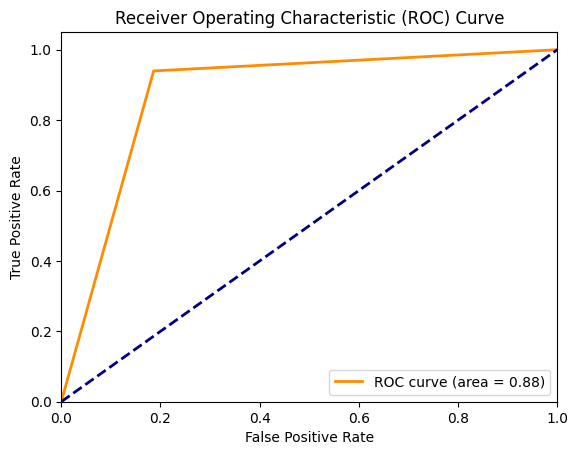

In [85]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing 'y_act' and 'Y_pred' columns

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(EMH_results['y_act'], EMH_results['Y_pred'])

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)
print(roc_auc)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##  **GITHUB**
**Load the dataset with predictions and actual values after running the ncats-adme model form github**

In [86]:
github_results = pd.read_csv(input_file3)
github_results

,simile,Predicted Class Probility,y_act,Y_pred
0,O=C(Nc1ncc(-c2ccccc2)s1)c1ccc(-c2cccc([N+](=O)...,0.980,1,1
1,Cc1ccc(S(=O)(=O)Nc2ccccc2C(=O)Nc2ccc(-c3ccccc3...,0.895,1,1
2,Cc1cnc(-c2ccccc2C2COC2)nc1NCC1CCN(c2cccnc2)CC1,0.032,0,0
3,CN(C)c1ccc(S(=O)(=O)N2CCCCC2)cc1NS(=O)(=O)c1cc...,0.960,1,1
4,COc1ccc(CN2CCNc3cc(Nc4ccccc4)ncc3C2)cn1,0.050,0,0
...,...,...,...,...
994,Cc1nn(CCc2nc(-c3ccccc3F)cs2)c2[nH]c(=O)cc(C(F)...,0.972,1,1
995,Oc1ccc(-c2nc(C3CC3)nc3c2CCN(CC2CCCCC2)CC3)cc1,0.304,0,0
996,CCc1ccc(NC(=O)c2[nH]c(C)c(C(C)=O)c2C)cc1[S+](=...,0.928,1,1
997,Cc1cc(C)nc(NC(=S)N2CCN(c3ccc(C(F)(F)F)cc3Cl)CC...,0.997,1,1


0.8767547077525066


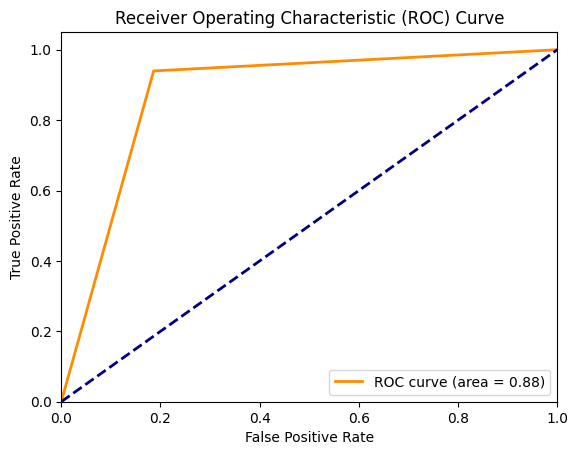

In [87]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing 'y_act' and 'Y_pred' columns

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(github_results['y_act'], github_results['Y_pred'])

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)
print(roc_auc)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [89]:
EMH_results.reset_index(drop=True, inplace=True)
github_results.reset_index(drop=True, inplace=True)

## **Results Comparison**

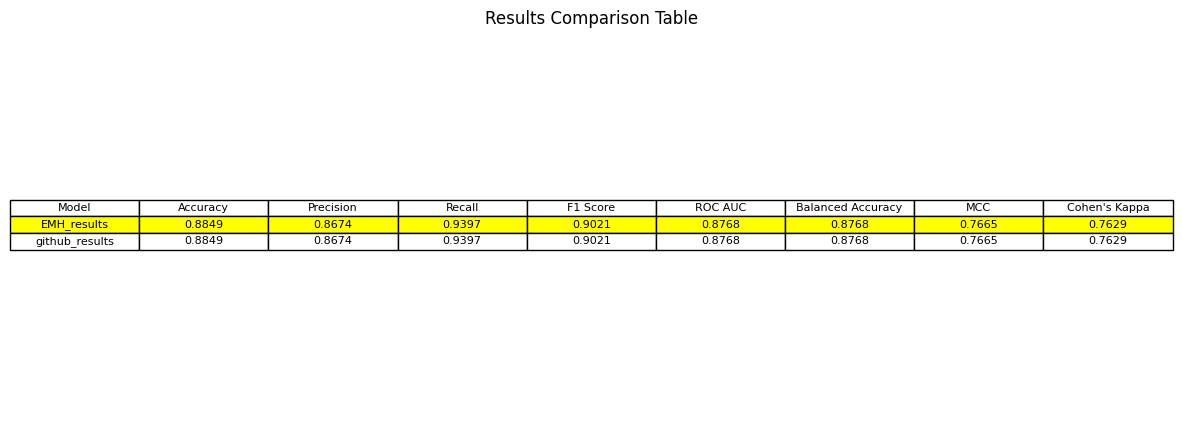

In [107]:
import math
from prettytable import PrettyTable
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score, matthews_corrcoef, cohen_kappa_score
import matplotlib.pyplot as plt

threshold = 0.5

metrics = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC", "Balanced Accuracy", "MCC", "Cohen's Kappa"]

table = PrettyTable()
table.field_names = metrics

models = [
    {"name": "EMH_results", "y_pred": EMH_results['Y_pred'], "y_act": EMH_results['y_act']},
    {"name": "github_results", "y_pred": github_results['Y_pred'], "y_act": github_results['y_act']}
]

for model in models:

    y_pred_binary = model["y_pred"]
    y_true = model['y_act']

    # Calculating the evaluation metrics
    accuracy = round(accuracy_score(y_true, y_pred_binary), 4)
    precision = round(precision_score(y_true, y_pred_binary), 4)
    recall = round(recall_score(y_true, y_pred_binary), 4)
    f1 = round(f1_score(y_true, y_pred_binary), 4)
    roc_auc = round(roc_auc_score(y_true, y_pred_binary), 4)
    balanced_accuracy = round(balanced_accuracy_score(y_true, y_pred_binary), 4)
    mcc = round(matthews_corrcoef(y_true, y_pred_binary), 4)
    cohen_kappa = round(cohen_kappa_score(y_true, y_pred_binary), 4)

    table.add_row([model["name"], accuracy, precision, recall, f1, roc_auc, balanced_accuracy, mcc, cohen_kappa])

# Save table as image with top heading color blue
plt.figure(figsize=(15, 5))
plt.axis('off')

# Change the color of the top heading to blue
cell_colors = [['yellow'] * 9]  # All columns are blue
for i in range(1):
    cell_colors.append(['white'] * len(metrics))  # Rest of the rows are white

plt.table(cellText=table._rows, colLabels=table.field_names, loc='center', cellLoc='center', cellColours=cell_colors)
plt.savefig('table_image.png', bbox_inches='tight', pad_inches=0.1)
plt.title('Results Comparison Table')
plt.show()